# Sydney Sailors: Penguins Dataset

Author: Sydney Sailors

Purpose: To use Jupyter to perform exploratory data analysis (EDA) on the Penguins dataset using tools such as pandas, Seaborn, and Matplotlib. This dataset shows the measurements of bills, flippers, and body mass for three species of penguins observed in Palmer Archipelago. The dataset can be found at [penguins](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv). 

## Imports section
1. pandas as pd
2. Seaborn as sns
3. Matplotlib
4. Numpy
5. Jupyterlab
6. matplotlib.axes as Axes

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy
import jupyterlab
import matplotlib.pyplot as plt

#Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 1. Load Data

In [12]:
# Load the Penguins dataset into pandas Dataframe
penguins_df: pd.DataFrame = sns.load_dataset('penguins')

# List column names
penguins_df.columns

# Inspect first few rows of the DataFrame
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 2. Initial Data Inspection

In [13]:
# Specify the number of rows to display
penguins_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
penguins_df.shape

# Inspect the data types of the columns with dtypes attribute
penguins_df.dtypes

# Inspect the data types of the columns with info() method
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 3. Initial Descriptive Statistics

In [14]:
# Inspect summary statistics for numerical columns
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## 4. Initial Data Distribution for Numerical Columns

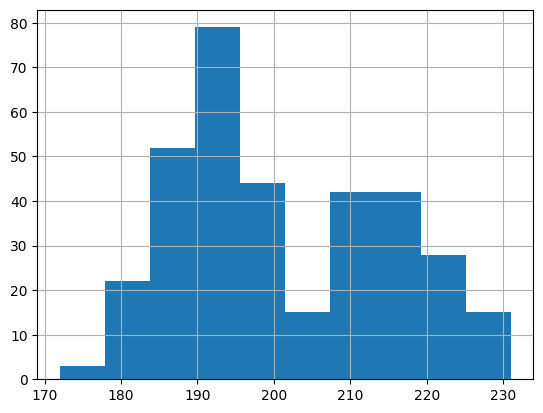

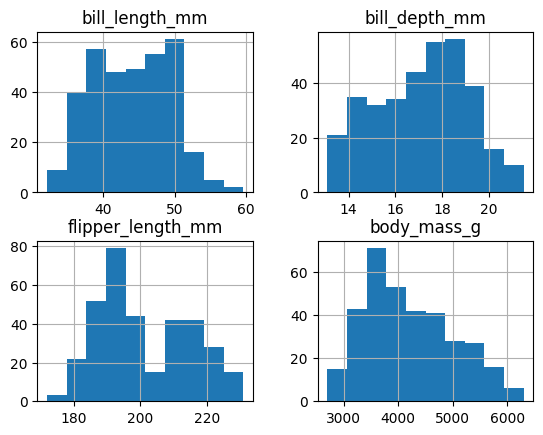

In [15]:
# Inspect histogram by one numerical column (flipper length)
penguins_df['flipper_length_mm'].hist()

# Inspect histograms for ALL numerical columns
penguins_df.hist()

# Show all plots
matplotlib.pyplot.show()

### Observations
- Each histogram gives a visualization of the data in the section prior. 
- `bill_length_mm` and `flipper_length_mm` histograms are bimodal, `body_mass_g` is more skewed to the right and `bill_depth_mm` is slightly skewed to the left. 
- Most penguins have a bill length between 30 and 50 mm. 
- Most penguins weigh between 3000 g and 4500 g.

## 5. Initial Data Distribution for Categorical Columns

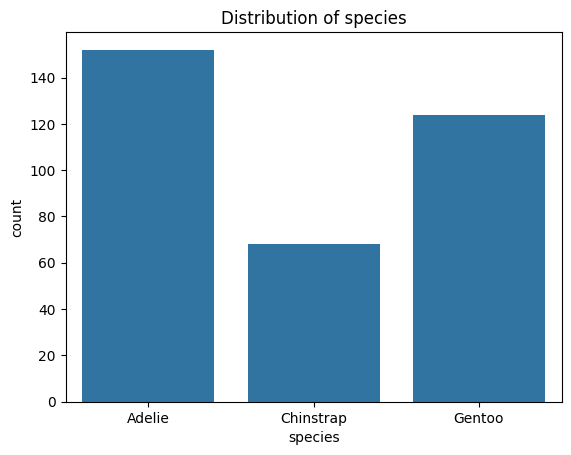

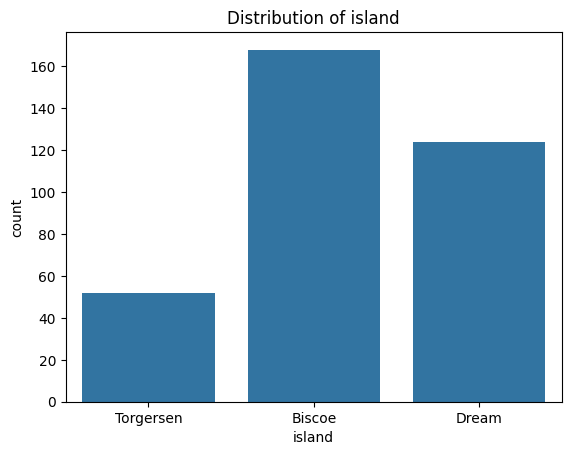

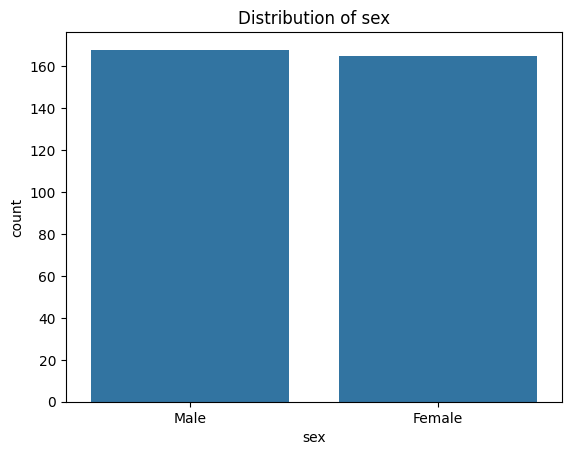

In [17]:
# Inspect value counts by categorical column
penguins_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in penguins_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=penguins_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

### Observations
- The Adelie species has the highest count of 152 penguins, while the Chinstrap species has the lowest count of 68 penguins.
- The Biscoe island holds the highest count of penguins from the dataset, while the Torgersen island holds the lowest count of penguins. 
- There is almost an even spead of males vs females in the dataset. 

## 6. Initial Data Transformation and Feature Engineering

In [18]:
# Renaming a column
penguins_df.rename(columns={'flipper_length_mm': 'Flipper Length'}, inplace=True)


# Adding a new column
penguins_df['Bill Area'] = penguins_df['bill_length_mm'] * penguins_df['bill_depth_mm']

## 7. Initial Visualizations

## Pairplot 

Goal: to visualize the relationships between all pairs of variables (Bill Length, Bill Depth, Flipper Legnth, Body Mass, Bill Area) for each species and to quickly see correlations and distributions. 

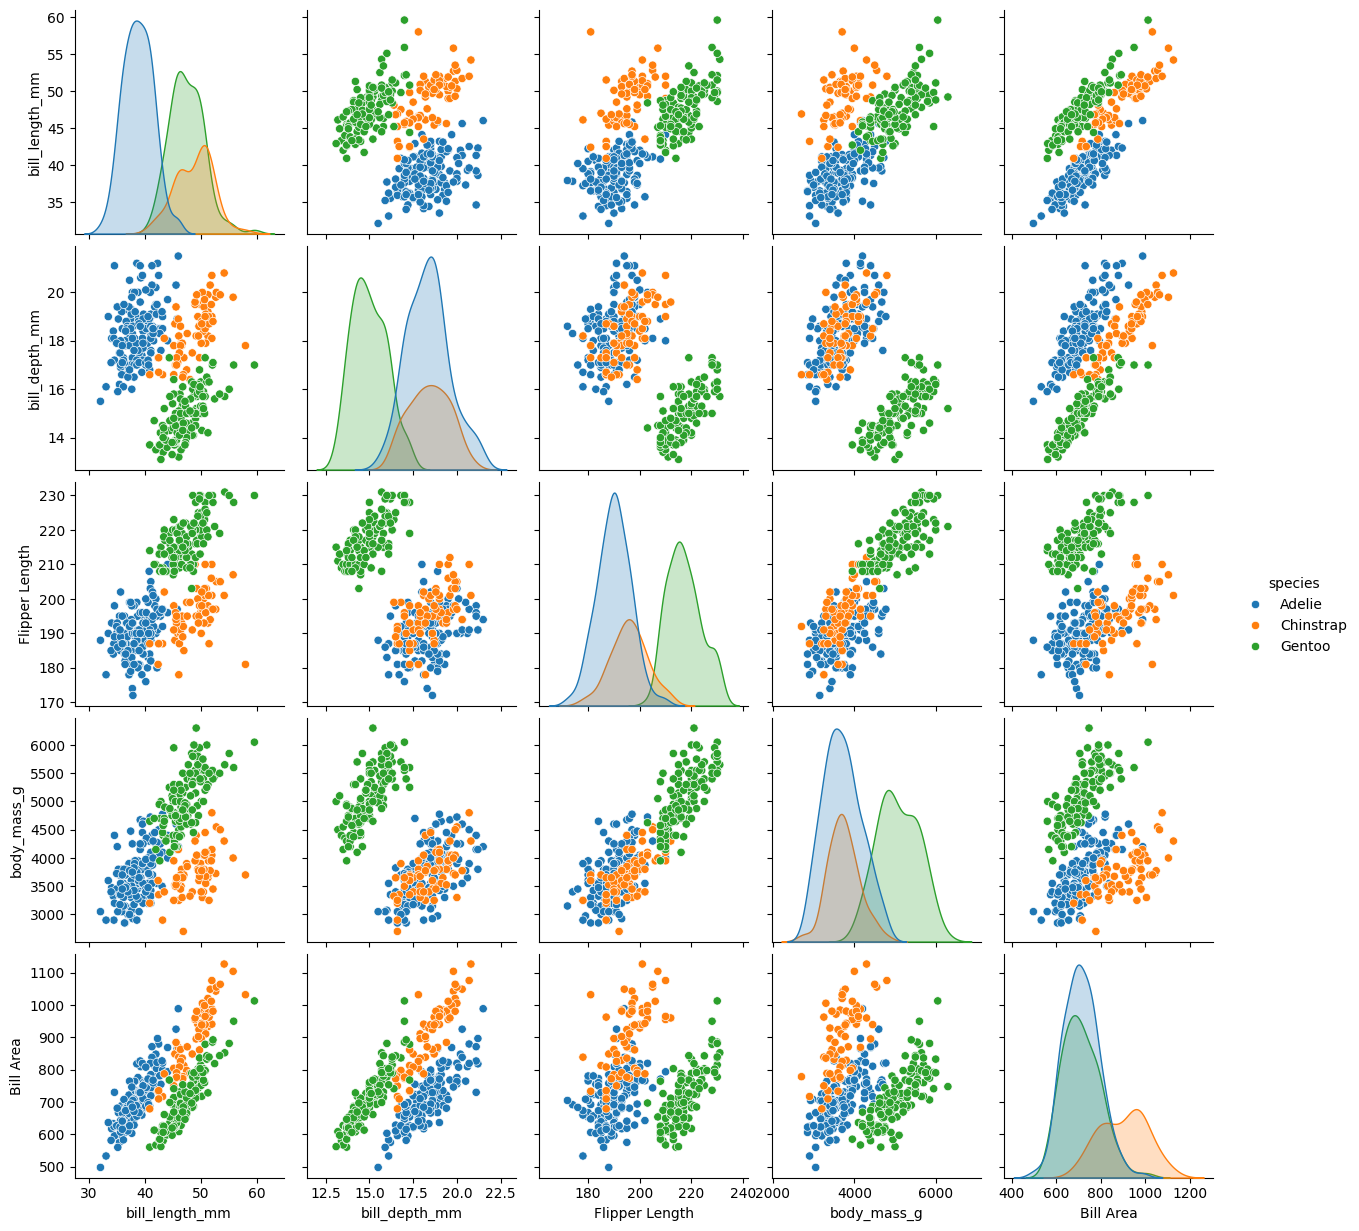

In [19]:
# Create a pairplot of the penguins dataset 
sns.pairplot(penguins_df, hue='species')

# Show all plots
matplotlib.pyplot.show()

### Observations
- The Adelie species:
  - This species has a high bill depth and a small bill length.
  - They have shorter flippers and are typically smaller in body mass compared to the other penguin species. 
- The Chinstrap species:
  - This species has a high bill depth and bill length, meaning the area of their bill is higher than the other species. 
  - Their body mass is smaller than the Gentoo species.
- The Gentoo species:
  - This species has a small bill depth and long bill length. 
  - They have significantly longer flippers and are usually larger (in body mass) compared to the other species. 

## Scatterplot

Goal: to visualize the relationship between two variables (Bill Length and Bill Area) for each species and to determine if there is a correlation between them. 

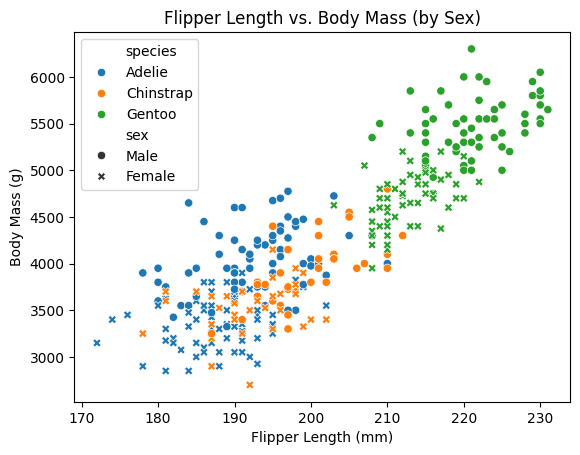

In [20]:
# Create a scatterplot of two numerical variables
scatter_plt: Axes= sns.scatterplot(
    data=penguins_df, x="Flipper Length", y="body_mass_g", hue="species", style="sex"
)

# Set axis labels using the Matplotlib Axis methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Flipper Length (mm)")
scatter_plt.set_ylabel("Body Mass (g)")

# Set the title using the Matplotlib Axis set_title() method
scatter_plt.set_title("Flipper Length vs. Body Mass (by Sex)")


# Show all plots
matplotlib.pyplot.show()

### Observations
- For all species, the females tend to have a smaller body mass and shorter flipper lengths than the males in the species. 

## Heatmap

Goal: to visualize the strength of the correlation between the different variables. 

Correlation Matrix
                bill_length_mm  bill_depth_mm  Flipper Length  body_mass_g  \
bill_length_mm        1.000000      -0.235053        0.656181     0.595110   
bill_depth_mm        -0.235053       1.000000       -0.583851    -0.471916   
Flipper Length        0.656181      -0.583851        1.000000     0.871202   
body_mass_g           0.595110      -0.471916        0.871202     1.000000   
Bill Area             0.657275       0.574723        0.083154     0.108206   

                Bill Area  
bill_length_mm   0.657275  
bill_depth_mm    0.574723  
Flipper Length   0.083154  
body_mass_g      0.108206  
Bill Area        1.000000  


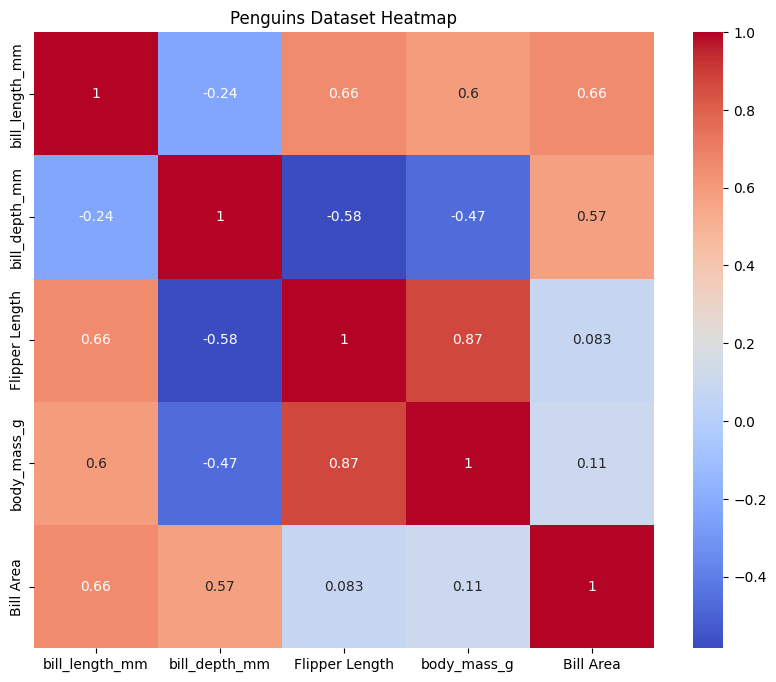

In [21]:
# Calculate correlation matrix
correlation_matrix = penguins_df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix")
print(correlation_matrix)

# Create a heatmap of the penguins dataset
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Penguins Dataset Heatmap')
plt.show()

### Observations
- Body mass and flipper length show a strong positive correlation which suggests the longer the flippers, the higher the body mass. 
- Bill depth tends to show a weaker correlation with the other features. 

## Notebook Checklist
- Notebook has exactly one Markdown title (with a single hash).
- Notebook has useful Markdown header cell with author and purpose, and optionally, the date.
- Notebook uses numbered second level Markdown headings for organization. 
- Notebook has an Imports section.
- Notebook has numbered sections with useful content for:
  - 1. Load Data
  - 2. Initial Data Inspection
  - 3. Initial Descriptive Statistics
  - 4. Initial Data Distribution for Numerical Columns
  - 5. Initial Data Transformation and Feature Engineering
  - 6. Initial Visualizations
  - 7. Initial Insights
- Notebook includes commentary as we go that tells a unique data story. 
- Notebook includes unique insights into the dataset. 
- Code and visuals are working, notebook is fully executed and on display in GitHub. 